In [1]:
import pandas as pd

from util.performance import plot_moderation_performance
from tqdm import tqdm
from kneed import DataGenerator, KneeLocator

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# load df
names = ['CNN1_BL', 'CNN1_MCD', 'CNN1_BBB', 'CNN1_EN']
label = ['CNN-BL', 'CNN-MCD', 'CNN-BBB', 'CNN-EN']
colours = ['b', 'r', 'y', 'g']
dfs_all = []
for name in names:
    dfs = []
    for i in range(5):
        df = pd.read_pickle(f"../pickle/newsGroups/{name}_{i}.pkl")
        dfs.append(df)
        i = i+1
    dfs_all.append(dfs)

In [3]:
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

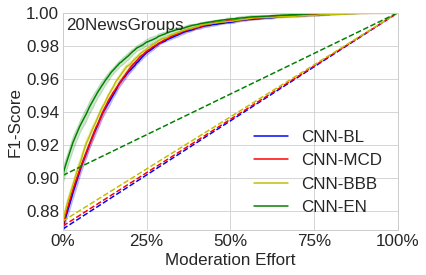

In [4]:
for i in range(len(dfs_all)):
    plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]
plt.legend([handles[idx] for idx in order],[label[idx] for idx in order])

plt.xlim((0, 1))
plt.ylim((0.868, 1))

plt.xticks([0, .25, .50, .75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.yticks([0.88, .9, .92, .94, .96, .98, 1], ['0.88', '0.90', '0.92', '0.94', '0.96', '0.98', '1.00'])

plt.xlabel('Moderation Effort')
plt.ylabel('F1-Score')
plt.text(0.01, .990, '20NewsGroups')

plt.savefig('cnn1_20n_y.pdf', bbox_inches='tight')

100%|██████████| 4/4 [00:00<00:00, 27.10it/s]



CNN1_BL
Effort (%):  0.285
F1_Score  :  0.9810222222222222

CNN1_MCD
Effort (%):  0.286
F1_Score  :  0.9814666666666667

CNN1_BBB
Effort (%):  0.275
F1_Score  :  0.9812888888888889

CNN1_EN
Effort (%):  0.277
F1_Score  :  0.9845777777777778


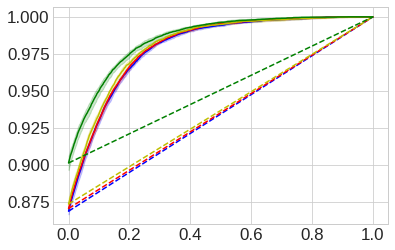

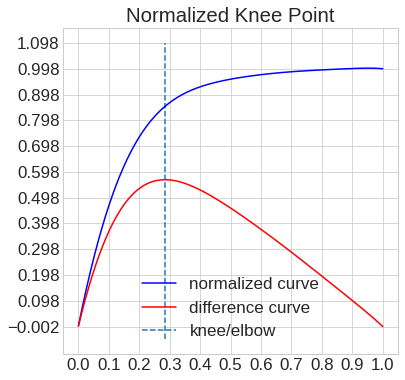

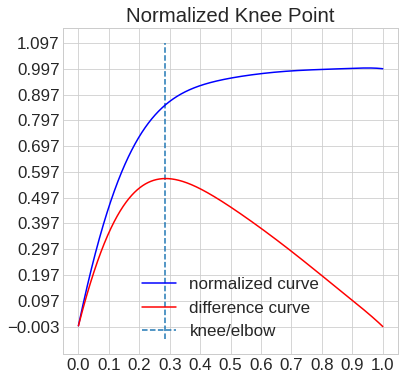

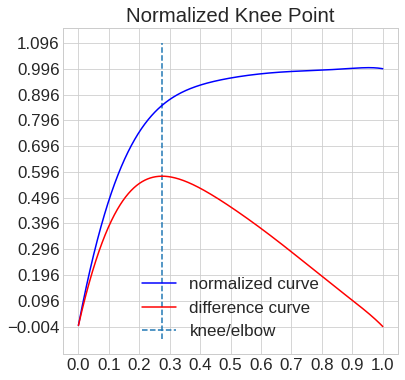

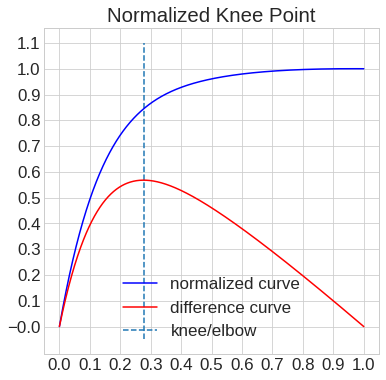

In [5]:
# Knee LC

values = []

for i in tqdm(range(len(dfs_all))):
    a, b = plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro', eps=1000)
    values.append((a, b))

i = 0
for (a, b) in tqdm(values):
    x = a
    y = b.values
    kneedle = KneeLocator(x, y, S=1.0, curve='concave', direction='increasing', interp_method="polynomial")
    
    print('\n' + names[i])
    print('Effort (%): ', round(kneedle.knee, 3))
    print('F1_Score  : ', y[int(kneedle.knee*1000)])
    kneedle.plot_knee_normalized()
    i+= 1